In [373]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
df = pd.read_csv("sentiment_analysisC.csv")

In [375]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       499 non-null    object
 1   sentiment  499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None
                                                text sentiment
0              What a great day!!! Looks like dream.  positive
1     I feel sorry, I miss you here in the sea beach  positive
2                                     Don't angry me  negative
3  We attend in the class just for listening teac...  negative
4                  Those who want to go, let them go  negative


In [376]:
df.columns = ["text", "sentiment"]

In [377]:
df["sentiment_encoded"] = df["sentiment"].map({"negative":-1, "neutral":0, "positive":1})

In [378]:
X = df['text']
y = df['sentiment_encoded']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [380]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [381]:
df.isna().sum()

text                 0
sentiment            0
sentiment_encoded    0
dtype: int64

In [382]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [383]:
y_pred = knn.predict(X_test)

In [384]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.47

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.22      0.36        36
           0       0.36      0.93      0.52        30
           1       0.85      0.32      0.47        34

    accuracy                           0.47       100
   macro avg       0.70      0.49      0.45       100
weighted avg       0.72      0.47      0.44       100


Confusion Matrix:
 [[ 8 27  1]
 [ 1 28  1]
 [ 0 23 11]]


Text(0.5, 1.0, 'Confusion Matrix')

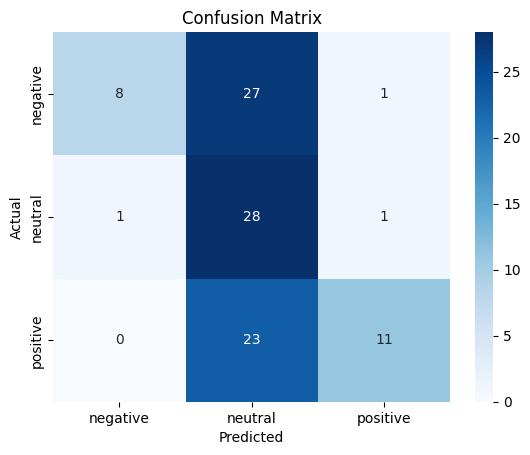

In [385]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [386]:
k_values = list(range(1,25))
errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    errors.append(1-accuracy_score(y_test, y_pred_k))

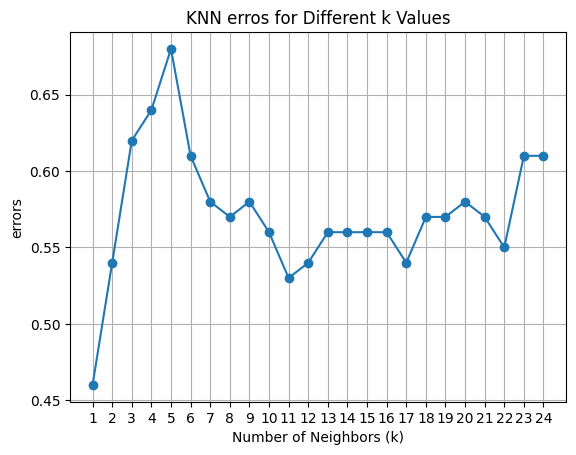

In [387]:
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("errors")
plt.title("KNN erros for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()